In [3]:
import numpy as np # Load numpy  package
import pandas as pd # Load pandas package

In [4]:
!pip install plotnine

^C


In [5]:
from plotnine import *

# helper function


In [26]:
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in 
                 df.columns.to_flat_index()]
    return df

def p80(x):
    return x.quantile(0.8)

def p90(x):
    return x.quantile(0.9)

def p95(x):
    return x.quantile(0.95)

def p99(x):
    return x.quantile(0.99)

In [32]:
mtcars=pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')


In [3]:
mtcars.head(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


# select
equivalent to tidyverse `select` 

In [4]:
mtcars.filter(['mpg','cyl','hp']).head(3)

,mpg,cyl,hp
0,21.0,6,110
1,21.0,6,110
2,22.8,4,93


# filter
equivalent to tidyverse `select` 

In [10]:
mtcars.query(''' mpg>23 and hp<90 ''')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


`value == value` means value is not null  

`value != value` means value is null 

In [11]:
mtcars.query(''' mpg>23 and hp<90 and carb==carb ''')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


# mutate 


In [26]:
mtcars.eval('''carb_2Times=carb*2''').head(3).\
eval('''carb_4Times=carb_2Times*2
carb_8Times=carb_2Times*4 ''')


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,carb_2Times,carb_4Times,carb_8Times
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,8,16,32
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,8,16,32
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2,4,8


In [31]:
pd.core.computation.ops.MATHOPS = (*pd.core.computation.ops.MATHOPS, "where")

df = pd.DataFrame({"a": [2.0, 4.0, 5.0]})
pd.eval("where(df.a > 3.0, df.a, 1)", target=df)

0    1.0
1    4.0
2    5.0
dtype: float64

after setting `pd.core.computation.ops.MATHOPS = (*pd.core.computation.ops.MATHOPS, "where")`
we're able to do something like `ifelse(1,0)` in `eval`


In [32]:
mtcars.eval('''carb_2Times=carb*2''').head(3).\
eval('''carb_4Times=carb_2Times*2
carb_8Times=where(carb_2Times*4>30,1,0) ''')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,carb_2Times,carb_4Times,carb_8Times
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,8,16,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,8,16,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2,4,0


# summarise 

## n(), count_distinct()

In [40]:
mtcars.groupby('vs').agg({
'vs': ['nunique','count']}).reset_index().


vs              
     nunique count
0  0       1    18
1  1       1    14

In [45]:
s_dt=mtcars.groupby('vs').agg({
'vs': ['nunique','count']})
s_dt.columns = ["_".join(col).strip() for col in s_dt.columns.values]
s_dt.eval('vs_plus=vs_nunique+vs_count')

,vs_nunique,vs_count,vs_plus
vs,,,
0,1,18,19
1,1,14,15


In [27]:
#use helper function to reset column names

mtcars.groupby('vs').agg({'vs': ['nunique','count','max','min','mean','median',p80,p95]}).\
pipe(flatten_cols).\
eval('vs_plus=vs_nunique+vs_count')


,vs_nunique,vs_count,vs_max,vs_min,vs_mean,vs_median,vs_p80,vs_p95,vs_plus
vs,,,,,,,,,
0,1,18,0,0,0.0,0.0,0.0,0.0,19
1,1,14,1,1,1.0,1.0,1.0,1.0,15


##  how to conunt distinct a value based on other conditions 

## how to do case when mutate
issue with this is, we can't create case when in a pipe

In [33]:
conditions = [
    (mtcars['mpg'] <= 10),
    (mtcars['mpg'] <= 20),
    (mtcars['mpg'] > 20)
    ]

# create a list of the values we want to assign for each condition
values = ['<=10', '10 - <=20', '>20']

# create a new column and use np.select to assign values to it using our lists as arguments
mtcars.assign(mpt_grp = np.select(conditions, values, default="others")).head(3)



,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpt_grp
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,>20
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,>20
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,>20


# join

# ggplot 

C:\ProgramData\Anaconda3\envs\myenv_basic\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars


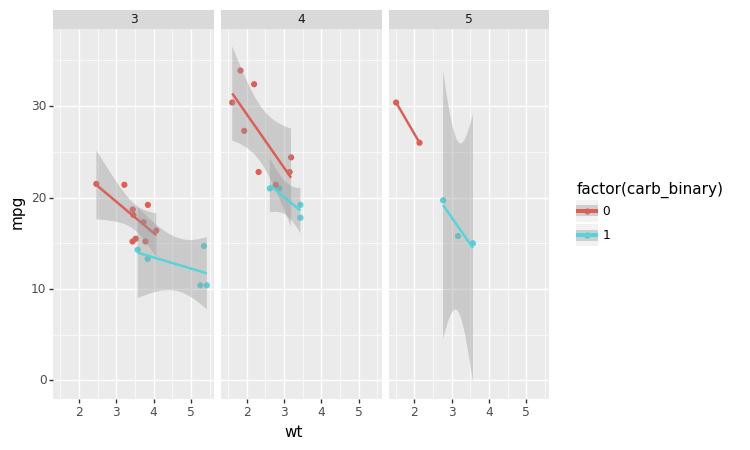

<ggplot: (116082322920)>

In [35]:
mt_plot_dt1=mtcars.eval('''carb_binary=where(carb>=4,1,0)''')
(ggplot(mt_plot_dt1, aes('wt', 'mpg', color='factor(carb_binary)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))